# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 8/11/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 8/11/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,3113,38928341,8.0
Albania,10808,2877800,375.6
Algeria,1524,43851043,3.5
Andorra,391,77265,506.1
Angola,335,32866268,1.0
Antarctica,0,0,NaN
Antigua and Barbuda,68,97928,69.4
Argentina,94972,45195777,210.1
Armenia,3283,2963234,110.8


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Micronesia,3610,113815,3171.8
"Korea, South",1491323,51269183,2908.8
Brunei,10899,437483,2491.3
Japan,2988168,126476458,2362.6
Greece,228252,10423056,2189.9
Barbados,5517,287371,1919.8
Montenegro,11414,628062,1817.3
Australia,433720,25459700,1703.6
New Zealand,75970,4822233,1575.4


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

8/7/22     31228322.0
8/8/22     31307020.0
8/9/22     31379757.0
8/10/22    31439645.0
8/11/22    31489484.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

7/29/22         NaN
7/30/22         2.0
7/31/22       861.0
8/1/22     102698.0
8/2/22      87681.0
8/3/22      74645.0
8/4/22      59506.0
8/5/22      49609.0
8/6/22          0.0
8/7/22          8.0
8/8/22      78698.0
8/9/22      72737.0
8/10/22     59888.0
8/11/22     49839.0
Name: Germany, dtype: float64

<AxesSubplot:>

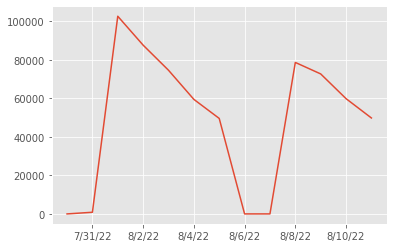

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

765.0433080831874